In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:
data = pd.read_csv('./data/stud.csv')

In [3]:
X = data.drop(columns='math_score')
y = data['math_score']

In [4]:
num_features = X.select_dtypes(exclude='object').columns
cath_features = X.select_dtypes(include='object').columns

In [6]:
preprocessor = ColumnTransformer(
    [
    ('OneHotEncoder',OneHotEncoder(),cath_features),
    ('StandardScaler',StandardScaler(),num_features)
    ]
)

In [8]:
X = preprocessor.fit_transform(X)

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [17]:
model = DecisionTreeRegressor()

In [18]:
model.fit(X_train,y_train)

DecisionTreeRegressor()

In [20]:
y_pred = model.predict(X_test)

y_pred

array([85., 42., 75., 72., 69., 88., 61., 52., 75., 64., 48., 47., 63.,
       40., 76., 75., 64., 44., 47., 40., 78., 42., 62., 41., 79., 88.,
       72., 49., 32., 42., 66., 77., 53., 85., 86., 49., 72., 67., 69.,
       32., 78., 62., 77., 64., 90., 59., 69., 27., 90., 68., 67., 77.,
       69., 46., 63., 70., 89., 58., 80., 95., 59., 67., 66., 46., 87.,
       62., 60., 58., 69., 87., 63., 84., 60., 52., 51., 81., 87., 73.,
       59., 64., 69., 39., 72., 70., 76., 53., 74., 65., 76., 30., 80.,
       82., 66., 90., 24., 68., 71., 68., 82., 53., 76., 70., 70., 58.,
       90., 71., 46., 71., 65., 53., 45., 73., 57., 53., 77., 62., 53.,
       59., 71., 86., 52., 61., 95., 63., 53., 66., 57., 65., 46., 71.,
       78., 86., 55., 94., 63., 38., 81., 87., 74., 45., 45., 66., 58.,
       54., 91., 54., 47., 86., 50., 74., 67., 77., 68., 65., 82., 65.,
       38., 71., 78., 50., 64., 60., 67., 60., 85., 79., 43., 87., 52.,
       77., 89., 68., 82., 75., 69., 32., 41., 63., 82., 64., 59

In [25]:
y_test

521    91
737    53
740    80
660    74
411    84
       ..
408    52
332    62
208    74
613    65
78     61
Name: math_score, Length: 200, dtype: int64

In [29]:
r2 = r2_score(y_test,y_pred).round(2)

print(f'The accuracy of the model is {r2 * 100}%')

The accuracy of the model is 72.0%


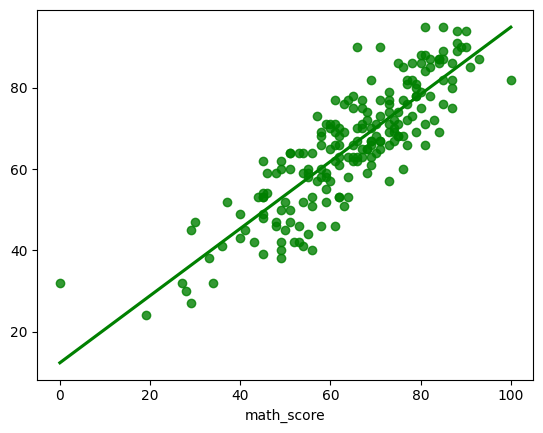

In [31]:
sns.regplot(x=y_test,y=y_pred,ci=None,color='green');